In [1]:
from langchain.chat_models import init_chat_model
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

model=init_chat_model("google_genai:gemini-2.5-flash")
response=model.invoke("Hello, how are you?")
print(response.content)

Hello! I'm functioning well and ready to assist you.

How can I help you today?


In [2]:
from langchain_tavily import TavilySearch

tavily_search_tool=TavilySearch(
    max_results=5,
    topic="general"
)

response=tavily_search_tool.invoke("What is the news of AI")
print(response)

{'query': 'What is the news of AI', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.reuters.com/technology/artificial-intelligence/', 'title': 'AI News | Latest Headlines and Developments | Reuters', 'content': "Momentum AI New York, opens new tab. Momentum AI London, opens new tab. Momentum AI Austin, opens new tab. Momentum AI Finance, opens new tab. ## Technology and AI. Chinese AI companies 'distilled' Claude to improve own models, Anthropic says. Big Tech to invest about $650 billion in AI in 2026, Bridgewater says. U.S. technology giants Alphabet , Amazon , Meta and Microsoft are expected to collectively invest about $650 billion to scale up AI-related infrastructure this year, according to an analysis by Bridgewater Associates. U.S. Defense Secretary Pete Hegseth has summoned artificial intelligence company Anthropic's CEO Dario Amodei to the Pentagon on Tuesday for what is expected to be potentially tough talks over the military use o

In [3]:
from langchain.tools import tool

@tool("calculator", description="Performs arithmetic calculations. Use this for any math problems.")
def calc(expression: str) -> str:
    """Evaluate mathematical expressions."""
    return str(eval(expression))

In [4]:
from langchain.agents import create_agent

agent=create_agent(model,[tavily_search_tool,calc])




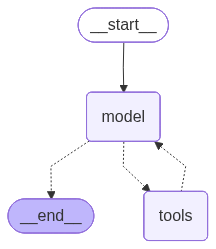

In [5]:
agent

In [6]:
user_input="what the current AI news for Anthropic and what is the value for 5*2"

for step in agent.stream(
    {"messages":user_input},
    stream_mode="values"
):
    print(step["messages"][-1].content)

what the current AI news for Anthropic and what is the value for 5*2

10
[{'type': 'text', 'text': "Here's the current AI news for Anthropic:\n\nAnthropic has been quite active, with several key developments:\n*   They have raised $30 billion in Series G funding, bringing their valuation to $380 billion.\n*   They introduced Claude Sonnet 4.6 and Claude Opus 4.6.\n*   Anthropic is collaborating with the Government of Rwanda on AI initiatives in health and education.\n*   They have opened an office in Bengaluru, India, and formed new partnerships across the country.\n*   A partnership with CodePath aims to bring Claude to the largest collegiate computer science program in the US.\n*   New research has been published on measuring AI agent autonomy.\n*   The Pentagon has met with Anthropic's chief to discuss the limits of their AI technology for classified systems.\n*   Anthropic launched Claude Code Security, an AI-powered tool to scan codebases for vulnerabilities and suggest fixes.\n\n